# Import Required Libraries
Import the necessary libraries, including pathlib, re, rich, numpy, pandas, logging, and the MERTISSessionReader class.

In [1]:
# Import Required Libraries
import pathlib
import rich
import mertisreader as mr
import pandas as pd
# # Set up logging
# logging.basicConfig(level=logging.INFO)

# Verify the imports
print("Libraries imported successfully.")

Libraries imported successfully.


# Initialize MERTISSessionReader
Initialize the MERTISSessionReader with the input directory and optional parameters for output directory and log level.

In [2]:
# Initialize MERTISSessionReader
input_path = pathlib.Path('../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal')
output_path = pathlib.Path('/tmp/')
log_level = 'INFO'

# check if the input path exists
if not input_path.exists():
    print(f"Input path {input_path} does not exist.")
else:
    print(f"Reading path {input_path}")


Reading path ../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal


In [3]:

# Initialize the MERTISDataPackReader with the input directory and optional parameters
ms_reader = mr.MERTISDataPackReader(input_dir=input_path, output_dir=output_path, log_level=log_level)

# Verify the initialization
print(f'MERTISSessionReader initialized with input directory: {ms_reader.input_dir}')
print(f'Output directory: {ms_reader.output_dir}')
print(f'Log level: {ms_reader.log_level}')

2025-10-01 16:18:22,968|3495969|INFO|input_dir=PosixPath('../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal')


MERTISSessionReader initialized with input directory: ../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal
Output directory: /tmp
Log level: INFO


# Show Files in Input Directory
Use the show_files method to print statistics about the files in the input directory.

In [4]:
# Show Files in Input Directory
ms_reader.show_files()

All files in input_dir :


Counter({'.dat': 2, '.lblx': 3, '.fits': 1})

All files in input_dir matching old pattern <v0.2.6 (\d{8}_\d{8}):


Counter()

All files in input_dir matching new pattern >=v0.2.6 (mer_cal_sc_tis_YYYYMMDD_1-...):


Counter({'mer_cal_sc_tis': 1})

# List File Types
Use the listfiletypes method to print the list of file types and the number of files for each file type.

In [5]:
# List File Types
ms_reader.listfiletypes()

{
    'hk_default': ['mer_cal_hk_default_20200409_1-0651130766-12538__0_1.dat'],
    'hk_extended': ['mer_cal_hk_extended_20200409_1-0651130766-12595__0_1.dat'],
    'sc_tis': ['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1.fits'],
    'sc_tir': [],
    'sc_tis_ql': [],
    'sc_tir_ql': []
}

{'hk_default': 1, 'hk_extended': 1, 'sc_tis': 1, 'sc_tir': 0, 'sc_tis_ql': 0, 'sc_tir_ql': 0}

# Collect Data
Use the data_collector method to collect data from the input files and store it in the collect_data attribute.

In [6]:
# Collect Data
ms_reader.data_collector()

# Verify the collected data
print(f'Collected data keys: {ms_reader.collect_data.keys()}')
for key, value in ms_reader.collect_data.items():
    print(f'{key}: {len(value)} files collected')

Reading filetype: hk_default from mer_cal_hk_default_20200409_1-0651130766-12538__0_1
Reading filetype: hk_extended from mer_cal_hk_extended_20200409_1-0651130766-12595__0_1
Reading filetype: tis from mer_cal_sc_tis_20200409_1-0651130819-21186__0_1
Collected data keys: dict_keys(['hk_default', 'hk_extended', 'tis'])
hk_default: 1 files collected
hk_extended: 1 files collected
tis: 1 files collected


# Assemble Data
Use the data_assembler method to assemble the collected data into convenient data structures.

In [7]:
# Assemble Data
ms_reader.data_assembler(verbose=True)


Output()

Reading filetype: tis from 
../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal/me
r_cal_sc_tis_20200409_1-0651130819-21186__0_1.fits

n_wav=40 # generic wavelengths : not precise enough for scientific analysis!
|    | tis_stem                                        |   finite(geo) |   geo.size |
|---:|:------------------------------------------------|--------------:|-----------:|
|  0 | mer_cal_sc_tis_20200409_1-0651130819-21186__0_1 |           672 |      10500 |
Indices of measurements targets (HK_STAT_TIS_DATA_ACQ_TARGET):
space_index.shape=(21,)
bb7_index.shape=(0,)
bb3_index.shape=(0,)
planet_index.shape=(0,)
Collected data statistics:
Number of TIS files: 1
Number of HK files: 2
Number of TIR files: 0
Number of TIS QL files: 0
Number of TIR QL files: 0


In [8]:

# Verify the assembled data
if ms_reader.processing_level != "RAW":
    print(f'Geometry data keys: {ms_reader.geom_ls.keys()}')
print(f'Frames data keys: {ms_reader.frames.keys()}')
print('Shape for each file DataCube, filename is the dict key :')
rich.print({k:v.shape for k,v in ms_reader.frames.items()})
print(f'Wavelengths data keys: {ms_reader.wavelengths.keys()}')
print(f'MERTIS TIS metadata keys: {ms_reader.mertis_tis_metadata.keys()}')
print(f'Space index shape: {ms_reader.space_index.shape}')
print(f'BB7 index shape: {ms_reader.bb7_index.shape}')
print(f'BB3 index shape: {ms_reader.bb3_index.shape}')
print(f'Planet index shape: {ms_reader.planet_index.shape}')


Geometry data keys: dict_keys(['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1'])
Frames data keys: dict_keys(['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1'])
Shape for each file DataCube, filename is the dict key :


{'mer_cal_sc_tis_20200409_1-0651130819-21186__0_1': (40, 100, 21)}

Wavelengths data keys: dict_keys(['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1'])
MERTIS TIS metadata keys: dict_keys(['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1'])
Space index shape: (21,)
BB7 index shape: (0,)
BB3 index shape: (0,)
Planet index shape: (0,)


In [ ]:
file_key = list(ms_reader.frames.keys())[0]
print(f'Example DataCube shape for file {file_key}: {ms_reader.frames[file_key].shape}')


Example DataCube shape for file mer_cal_sc_tis_20200409_1-0651130819-21186__0_1: (40, 100, 21)


In [10]:
keys = [ 
 'bb3_index',
 'bb7_index',
 'planet_index',
 'space_index',
 'collect_data',
 'fits_files',
 'frames',
 'geom_ls',
 'input_dir',
 'input_path_dict',
 'log_level',
 'mertis_tis_metadata',
 'output_dir',
 'wavelengths']


# for each element in keys get attribute with samme name from ms_reader obbject and print the type of the attribute
for key in keys:
    attr = getattr(ms_reader, key)
    if isinstance(attr, dict):
        print(f'{key}: dict {len(attr.keys())} keys:')
        for k, v in attr.items():
            print(f'   {k}: {type(v)}')
    elif isinstance(attr, pathlib.Path):
        print(f'{key}: {attr}')
    elif isinstance(attr, pd.core.indexes.base.Index):
        print(f'{key}: {attr.shape}')
    elif isinstance(attr, list):
        print(f'{key}: {len(attr)}')
    elif isinstance(attr, str):
        print(f'{key}: {attr}')
    else:
        print(f'UNCAUGHT {key}: {type(attr)}')



bb3_index: (0,)
bb7_index: (0,)
planet_index: (0,)
space_index: (21,)
collect_data: dict 3 keys:
   hk_default: <class 'list'>
   hk_extended: <class 'list'>
   tis: <class 'list'>
fits_files: 3
frames: dict 1 keys:
   mer_cal_sc_tis_20200409_1-0651130819-21186__0_1: <class 'numpy.ndarray'>
geom_ls: dict 1 keys:
   mer_cal_sc_tis_20200409_1-0651130819-21186__0_1: <class 'dict'>
input_dir: ../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal
input_path_dict: dict 6 keys:
   hk_default: <class 'list'>
   hk_extended: <class 'list'>
   sc_tis: <class 'list'>
   sc_tir: <class 'list'>
   sc_tis_ql: <class 'list'>
   sc_tir_ql: <class 'list'>
log_level: INFO
mertis_tis_metadata: dict 1 keys:
   mer_cal_sc_tis_20200409_1-0651130819-21186__0_1: <class 'pandas.core.frame.DataFrame'>
output_dir: /tmp
wavelengths: dict 1 keys:
   mer_cal_sc_tis_20200409_1-0651130819-21186__0_1: <class 'numpy.ndarray'>


In [11]:
ms_reader.mertis_tis_metadata[file_key]

,TIME_UTC,TIME_OBT,TimeStamp,HK_STAT_TIS_DATA_ACQ_ID,HK_STAT_TIS_DATA_ACQ_TYPE,HK_STAT_TIS_DATA_ACQ_TARGET,HK_STAT_BOL_BIAS_VOLT_ACTIVE_PARAM_SET,HK_STAT_TIS_DATA_ACQ_TIME,PAR_TIS_BIN_MODE,PAR_TIS_WIN_SIZE,...,HK_STAT_TIS_COMP_NUM_BANDS,HK_STAT_TIS_NUM_OVERSAMP,HK_TEMP_BOL_CHIP,DAT_TIS_OFFSET_MACRO_PIXEL,HK_TEMP_BOL_HOUSING,HK_TEMP_OST_BASE_PLATE,PAR_TIS_DATA_NOISE_REDUCTION,HK_STAT_TIS_TOTAL_PACKET_NUM,HK_STAT_TIS_CURRENT_PACKET_NUM,HK_STAT_TIS_NUM_DATA_WORDS
0,2020-04-09T05:40:20.710Z,1/0651130819:21186,6.511308e+08,3740,Sci_Raw,Space,2,6.511308e+08,1x2,100x80pixel,...,5,0,15.000,1,9.527,9.894,0,1,1,384
1,2020-04-09T05:40:31.748Z,1/0651130830:23689,6.511308e+08,3743,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.000,2052,9.519,9.891,0,1,1,1206
2,2020-04-09T05:40:32.548Z,1/0651130831:10567,6.511308e+08,3744,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.003,2052,9.519,9.889,0,1,1,1200
3,2020-04-09T05:40:33.348Z,1/0651130831:62998,6.511308e+08,3745,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.002,2053,9.520,9.889,0,1,1,1208
4,2020-04-09T05:40:34.148Z,1/0651130832:49891,6.511308e+08,3746,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.001,2054,9.520,9.888,0,1,1,1192
5,2020-04-09T05:40:34.948Z,1/0651130833:36784,6.511308e+08,3747,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.002,2055,9.519,9.888,0,1,1,1194
6,2020-04-09T05:40:35.748Z,1/0651130834:23676,6.511308e+08,3748,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.001,2055,9.519,9.888,0,1,1,1204
7,2020-04-09T05:40:36.548Z,1/0651130835:10569,6.511308e+08,3749,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.002,2056,9.520,9.889,0,1,1,1196
8,2020-04-09T05:40:37.348Z,1/0651130835:62998,6.511308e+08,3750,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.001,2057,9.520,9.889,0,1,1,1218
9,2020-04-09T05:40:38.148Z,1/0651130836:49891,6.511308e+08,3751,Sci_Subtracted_BB3,Space,2,6.511308e+08,1x2,100x80pixel,...,5,32,15.000,2057,9.521,9.889,0,1,1,1200


# Plots

In [12]:
import matplotlib
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from IPython.display import display

In [13]:
ms_reader.mertis_tis_metadata[file_key].iloc[0:10].T

,0,1,2,3,4,5,6,7,8,9
TIME_UTC,2020-04-09T05:40:20.710Z,2020-04-09T05:40:31.748Z,2020-04-09T05:40:32.548Z,2020-04-09T05:40:33.348Z,2020-04-09T05:40:34.148Z,2020-04-09T05:40:34.948Z,2020-04-09T05:40:35.748Z,2020-04-09T05:40:36.548Z,2020-04-09T05:40:37.348Z,2020-04-09T05:40:38.148Z
TIME_OBT,1/0651130819:21186,1/0651130830:23689,1/0651130831:10567,1/0651130831:62998,1/0651130832:49891,1/0651130833:36784,1/0651130834:23676,1/0651130835:10569,1/0651130835:62998,1/0651130836:49891
TimeStamp,651130823.044403,651130830.950928,651130831.746674,651130832.544235,651130833.341141,651130834.138077,651130834.952408,651130835.749695,651130836.547485,651130837.344376
HK_STAT_TIS_DATA_ACQ_ID,3740,3743,3744,3745,3746,3747,3748,3749,3750,3751
HK_STAT_TIS_DATA_ACQ_TYPE,Sci_Raw,Sci_Subtracted_BB3,Sci_Subtracted_BB3,Sci_Subtracted_BB3,Sci_Subtracted_BB3,Sci_Subtracted_BB3,Sci_Subtracted_BB3,Sci_Subtracted_BB3,Sci_Subtracted_BB3,Sci_Subtracted_BB3
HK_STAT_TIS_DATA_ACQ_TARGET,Space,Space,Space,Space,Space,Space,Space,Space,Space,Space
HK_STAT_BOL_BIAS_VOLT_ACTIVE_PARAM_SET,2,2,2,2,2,2,2,2,2,2
HK_STAT_TIS_DATA_ACQ_TIME,651130819.323273,651130830.361465,651130831.16124,651130831.961273,651130832.761276,651130833.561279,651130834.361267,651130835.16127,651130835.961273,651130836.761276
PAR_TIS_BIN_MODE,1x2,1x2,1x2,1x2,1x2,1x2,1x2,1x2,1x2,1x2
PAR_TIS_WIN_SIZE,100x80pixel,100x80pixel,100x80pixel,100x80pixel,100x80pixel,100x80pixel,100x80pixel,100x80pixel,100x80pixel,100x80pixel


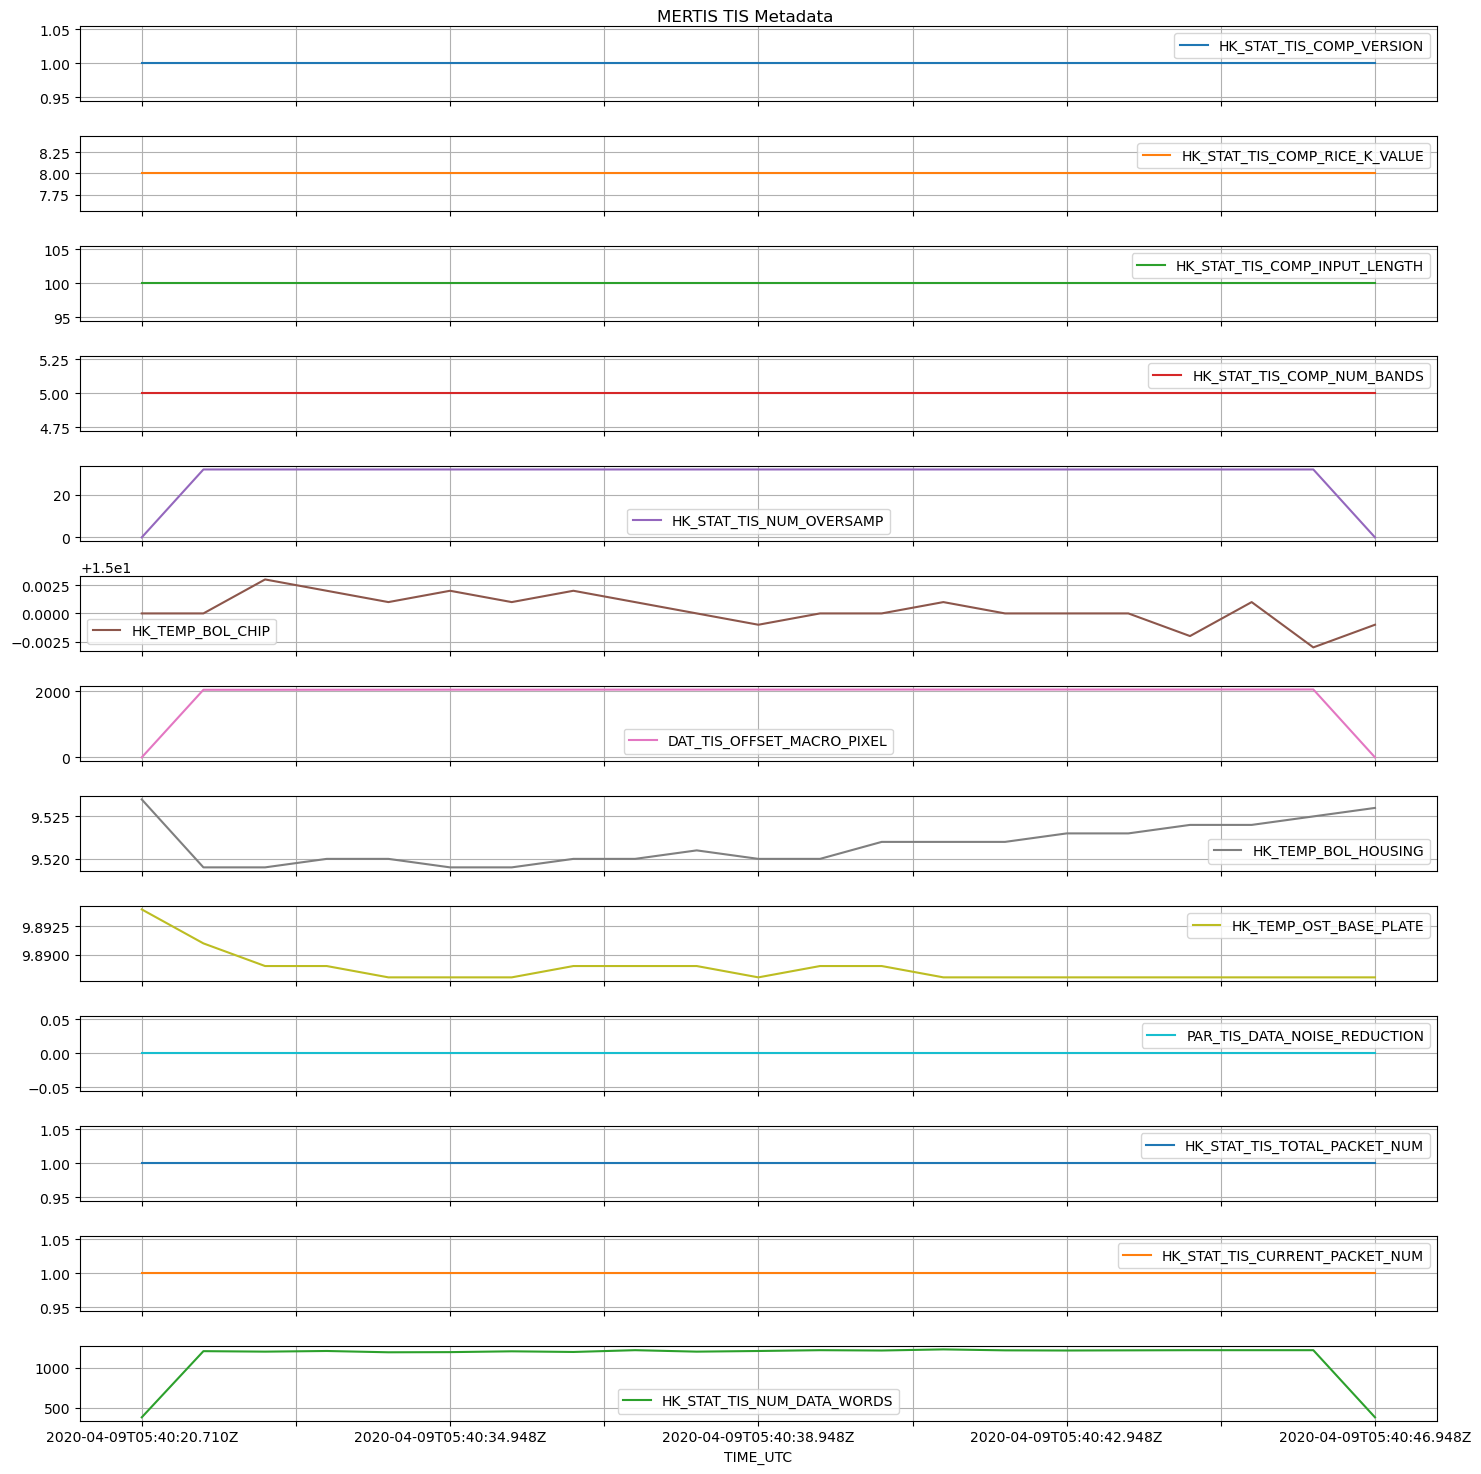

In [14]:
ms_reader.mertis_tis_metadata[file_key]\
    .set_index('TIME_UTC').loc[:,'HK_STAT_TIS_COMP_VERSION':]\
        .plot(figsize=[15,15], legend=True, title='MERTIS TIS Metadata', grid=True, subplots=True)

plt.tight_layout()


In [15]:
ms_reader.wavelengths[file_key].shape, ms_reader.frames[file_key].shape

((40, 100), (40, 100, 21))

plot_index: RangeIndex(start=0, stop=21, step=1)


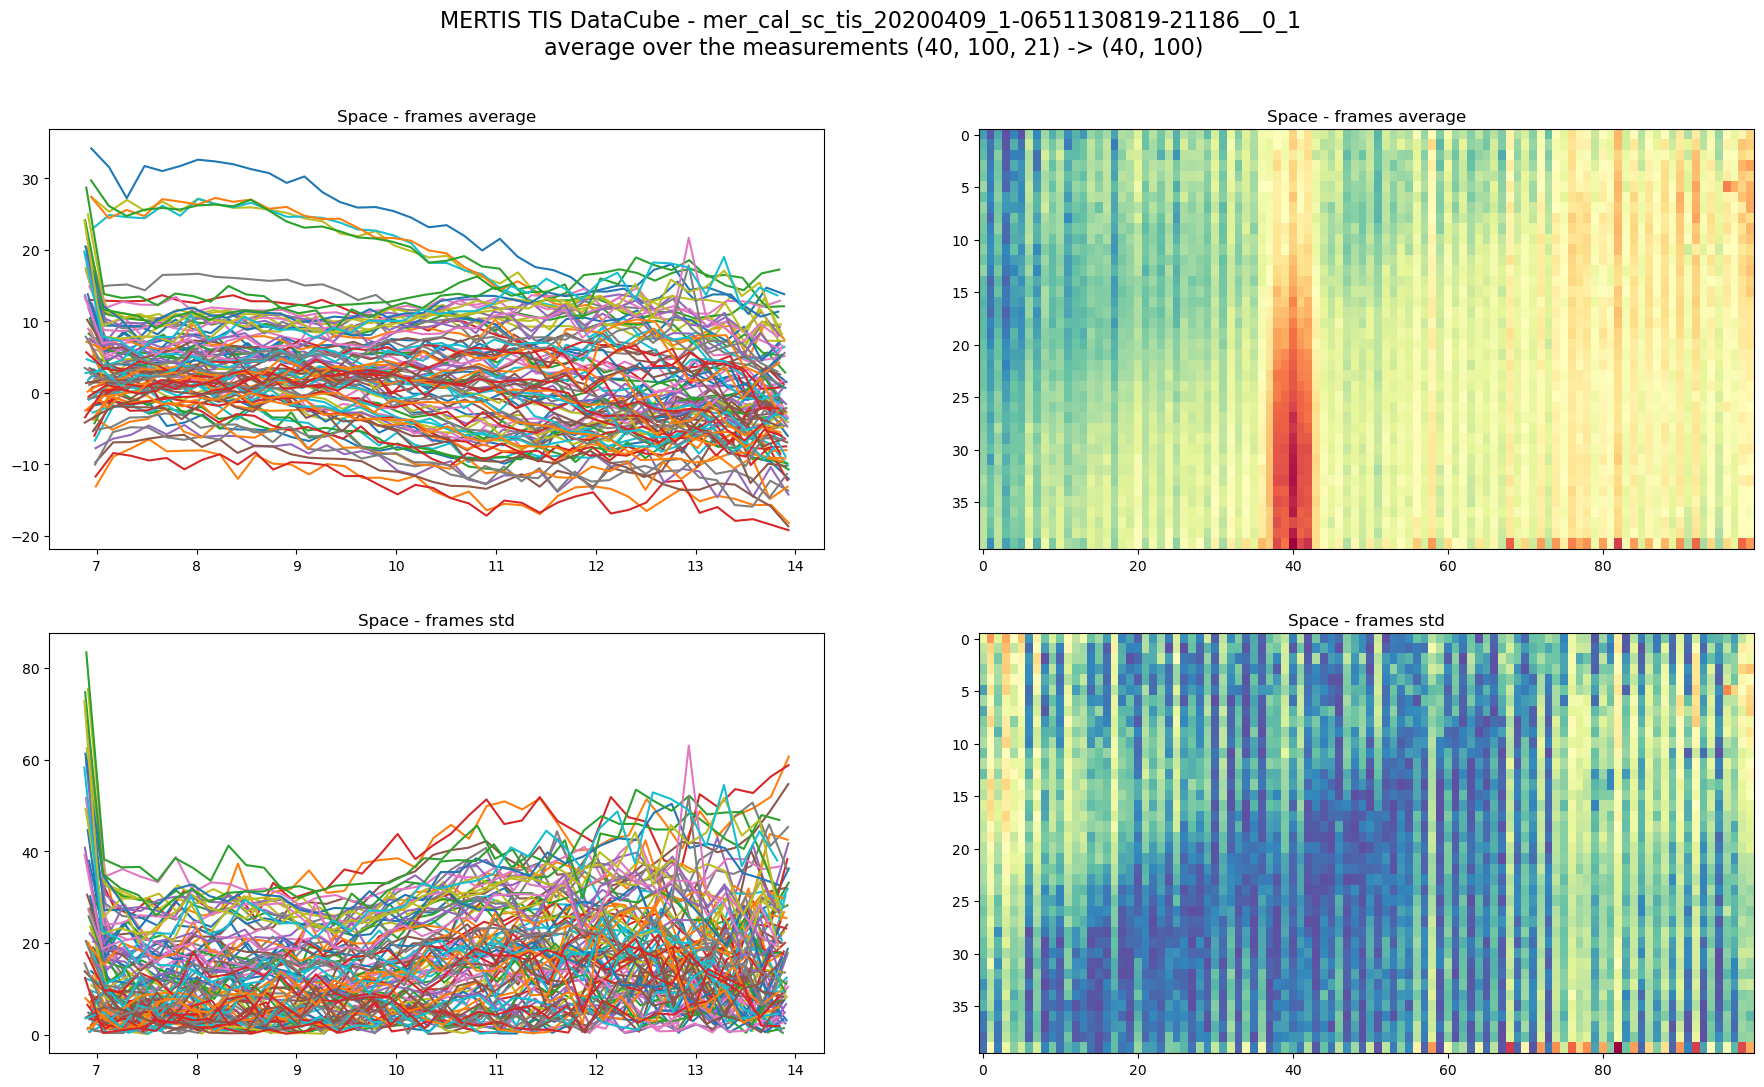

In [17]:
full_frames_3D = ms_reader.frames[file_key]
wav = ms_reader.wavelengths[file_key]
plot_index = ms_reader.space_index
print(f'plot_index: {plot_index}')

fig, ax = plt.subplots(ncols=2,nrows=2, figsize = [22,12])
fig.suptitle(f'MERTIS TIS DataCube - {file_key} \n'
             f'average over the measurements {full_frames_3D.shape} -> {full_frames_3D[:,:,0].shape}',
             fontsize=16)

title = 'Space'
ax[0][0].plot(wav,full_frames_3D[:,:,plot_index].mean(axis=2));
ax[0][0].set_title(f'{title} - frames average')
ax[0][1].imshow(full_frames_3D[:,:,plot_index].mean(axis=2),aspect='auto',cmap=plt.cm.Spectral_r)
ax[0][1].set_title(f'{title} - frames average')

ax[1][0].set_title(f'{title} - frames std')
ax[1][0].plot(wav,full_frames_3D[:,:,plot_index].std(axis=2));
ax[1][1].set_title(f'{title} - frames std')
ax[1][1].imshow(full_frames_3D[:,:,plot_index].std(axis=2),aspect='auto',cmap=plt.cm.Spectral_r)

